In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('FINAL_dataset_Category.csv')
category_counts = df['Category'].value_counts()

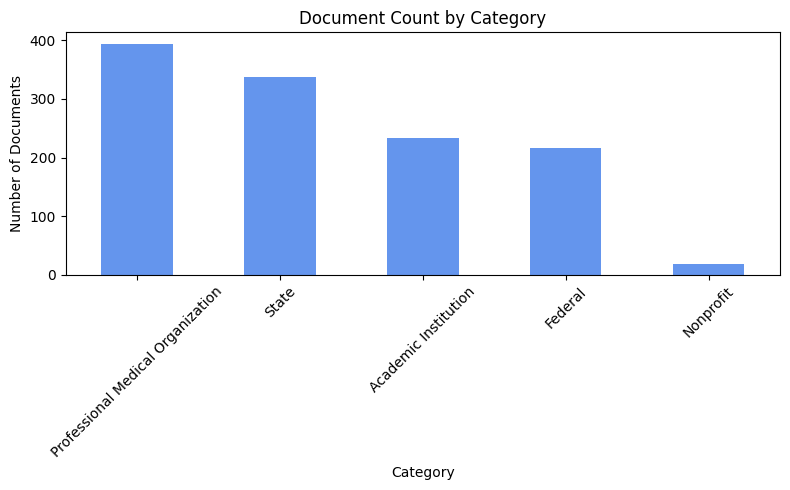

In [5]:
# Bar Chart
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='cornflowerblue')
plt.title("Document Count by Category")
plt.ylabel("Number of Documents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

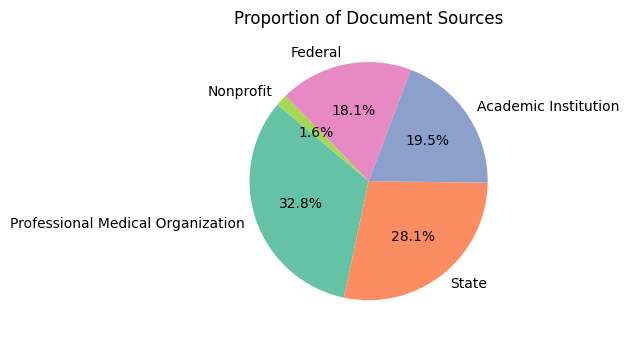

In [6]:
# Pie Chart
plt.figure(figsize=(6, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title("Proportion of Document Sources")
plt.ylabel("")
plt.tight_layout()
plt.show()

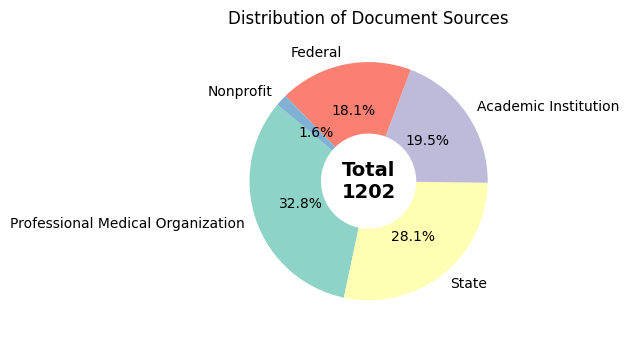

In [7]:
# Donut Chart
labels = category_counts.index
sizes = category_counts.values
colors = plt.cm.Set3.colors[:len(labels)]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.6),
    textprops=dict(color="black", fontsize=10)
)

total_docs = sum(sizes)
ax.text(0, 0, f"Total\n{total_docs}", ha='center', va='center', fontsize=14, fontweight='bold')

ax.set_title("Distribution of Document Sources")
plt.tight_layout()
plt.show()

In [8]:
df2 = pd.read_csv("FINAL_dataset_with_years_Manually_Reviewed.csv")
df['Year'] = df2['Year']
df_filtered = df.dropna(subset=["Year", "Category"])
df_filtered['Category'].value_counts()

Category
Professional Medical Organization    363
State                                302
Academic Institution                 222
Federal                              200
Nonprofit                             18
Name: count, dtype: int64

/var/folders/ch/jhr4866x61b11_jnr6wjc8fm0000gn/T/ipykernel_74415/1551183195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Year"] = df_filtered["Year"].astype(int)


<Figure size 1000x600 with 0 Axes>

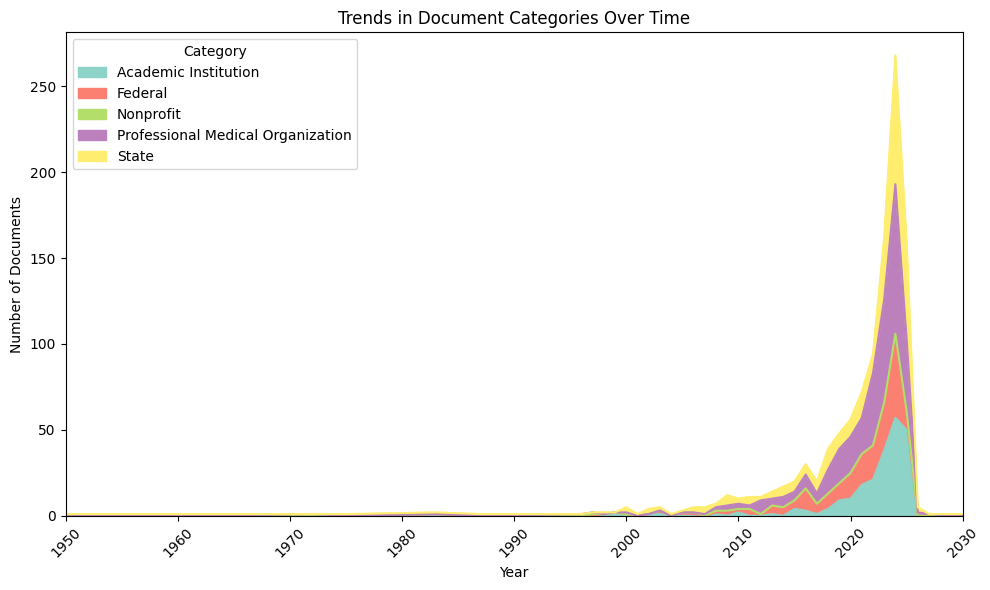

In [10]:
# Time trends visualization
df_filtered["Year"] = df_filtered["Year"].astype(int)

yearly_counts = df_filtered.groupby(["Year", "Category"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind="area", stacked=True, cmap="Set3", figsize=(10, 6))
plt.xlim(1950, 2030)
plt.title("Trends in Document Categories Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Documents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
import fitz  # PyMuPDF
import requests
from io import BytesIO

df = pd.read_csv('FINAL_dataset_Category.csv')

def extract_text_from_pdf_url(url, max_chars=2000):
    try:
        response = requests.get(url, timeout=15)
        response.raise_for_status()
        doc = fitz.open(stream=BytesIO(response.content), filetype="pdf")
        text = ""
        for page in doc:
            text += page.get_text()
            if len(text) >= max_chars:
                break
        return text.lower().strip()
    except Exception as e:
        return "__ERROR__"

In [12]:
from collections import defaultdict
from tqdm import tqdm
import time

category_texts = defaultdict(str)

for _, row in tqdm(df.iterrows(), total=len(df), desc="Extracting PDF text"):
    category = row["Category"]
    url = row["URL"]

    text = extract_text_from_pdf_url(url)
    if "__ERROR__" not in text and text.strip():
        category_texts[category] += " " + text

Extracting PDF text:   0%|          | 0/1202 [00:00<?, ?it/s]

Extracting PDF text:  51%|█████     | 613/1202 [12:35<05:59,  1.64it/s]  

MuPDF error: format error: cmsOpenProfileFromMem failed



Extracting PDF text: 100%|██████████| 1202/1202 [26:10<00:00,  1.31s/it]


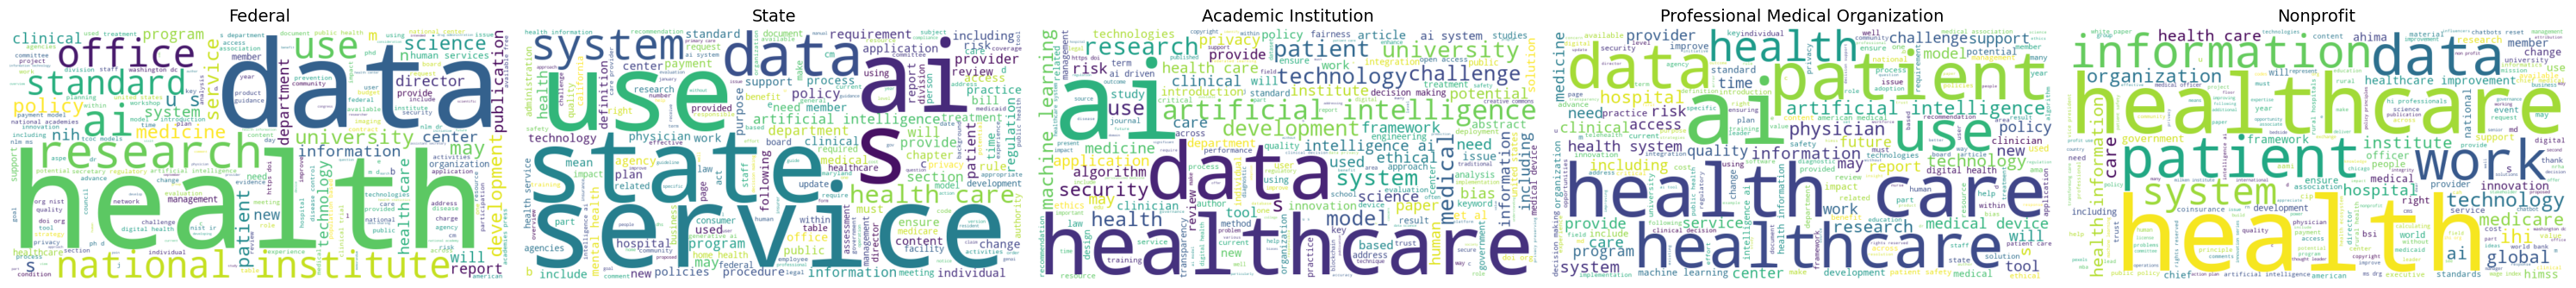

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(category_texts), figsize=(6 * len(category_texts), 5))

if len(category_texts) == 1:
    axes = [axes]

for ax, (category, text) in zip(axes, category_texts.items()):
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color="white").generate(text)
        ax.imshow(wc, interpolation="bilinear")
        ax.set_title(category, fontsize=14)
        ax.axis("off")
    else:
        ax.text(0.5, 0.5, "No Data", ha="center", va="center")
        ax.axis("off")

plt.tight_layout()
plt.show()

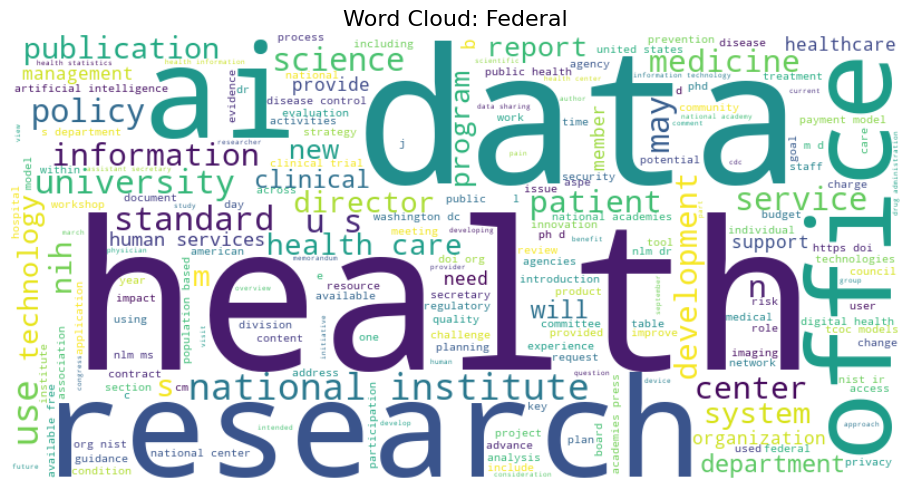

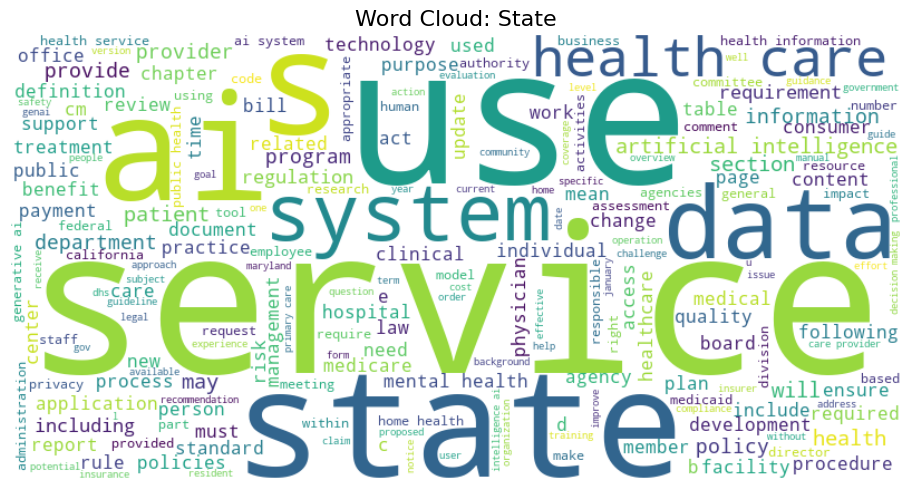

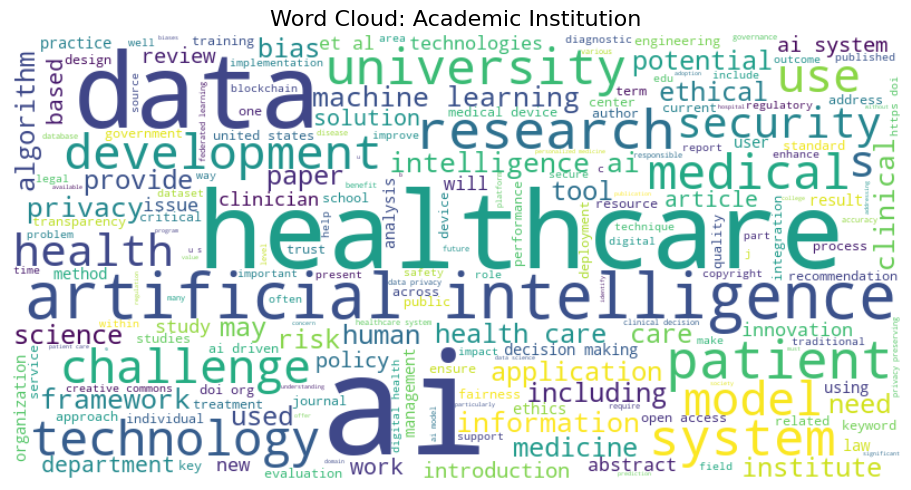

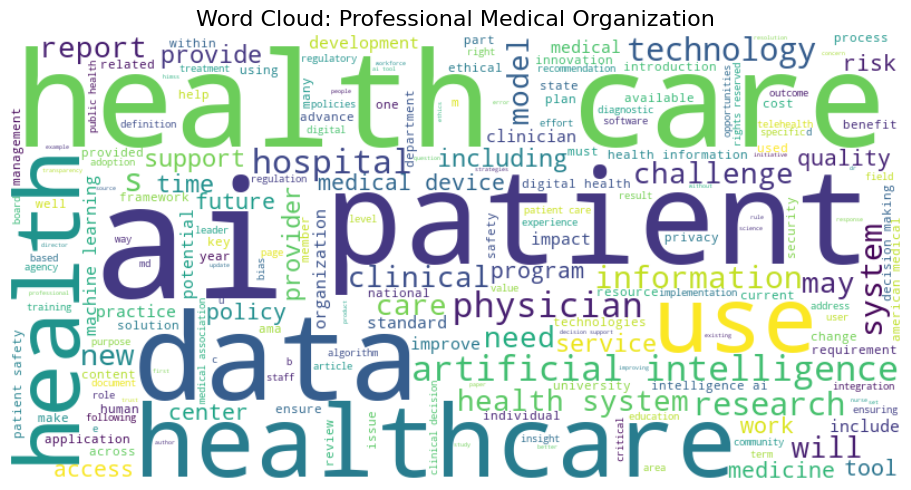

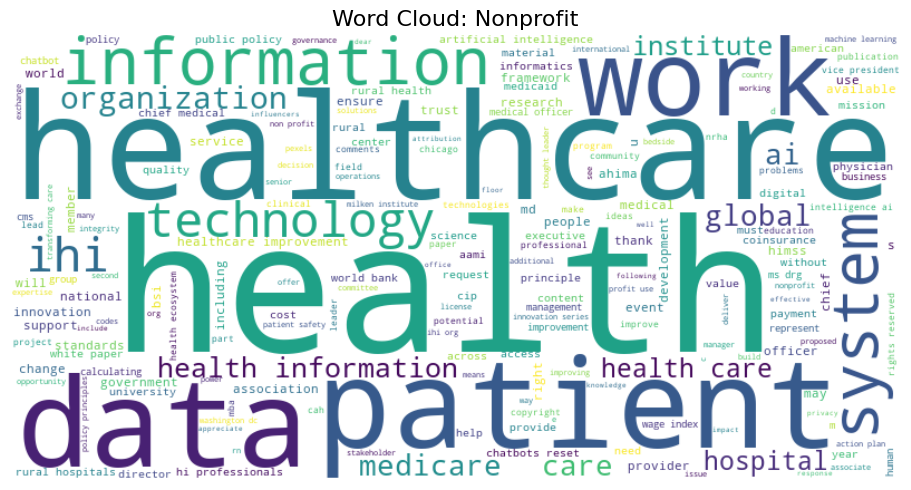

In [14]:
for category, text in category_texts.items():
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color="white").generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud: {category}", fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ No valid text for category: {category}")
